https://vene.ro/figurative-comparisons/#dataset

http://www.ep.liu.se/ecp/126/004/ecp16126004.pdf

https://www.aclweb.org/anthology/P13-3013

https://ansible.uk/misc/striking.html

in similes.txt, all phrases starting with 'Like' and 'As' were removed

Any old English, like "a flutter'd bird" were translated to modern spellings.

https://github.com/allenai/bilm-tf

http://www.english.su.se/polopoly_fs/1.100637.1347450592!/menu/standard/file/SMF_2012_Patrick_Hanks_plenary.pdf

https://www.academicscope.com/literature-review-on-automatic-simile-and-metaphor-recognizers/

McLachlan, G. J., & Rathnayake, S. (2014). On the number of components in a Gaussian mixture model. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 4(5), 341-355.

http://aclweb.org/anthology/W18-09

Computational considerations of comparisons and similes
https://www.aclweb.org/anthology/P13-3013

A Computational System of Metaphor Generation with Evaluation Mechanism
https://rd.springer.com/content/pdf/10.1007%2F978-3-642-15822-3_18.pdf

Towards the Automatic Mining of Similes in Literary Texts
http://www.ep.liu.se/ecp/126/004/ecp16126004.pdf

Literature Review on Automatic Simile and Metaphor Recognizers
https://www.academicscope.com/literature-review-on-automatic-simile-and-metaphor-recognizers/

https://github.com/alexWhitworth/emclustr/blob/master/R/clust_mvn_miss.R

In [1]:
import pandas as pd
import numpy as np

from itertools import permutations
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

import seaborn as sns
import matplotlib.pyplot as plt

from gensim.models.keyedvectors import KeyedVectors
import spacy

nlp = spacy.load('en_core_web_sm')

In [2]:
from allennlp.commands.elmo import ElmoEmbedder
elmo = ElmoEmbedder()

# Simile data

Components are manually extracted

In [22]:
sentences = pd.read_json('similes.json', orient='records')

%time sentences['nlp'] = sentences['original'].apply(lambda text: nlp(text))

topic_vectors =   np.random.random((len(sentences), 300))
event_vectors =   np.random.random((len(sentences), 300))
ground_vectors =  np.random.random((len(sentences), 300))
vehicle_vectors = np.random.random((len(sentences), 300))

len(sentences)

CPU times: user 2.9 s, sys: 292 ms, total: 3.19 s
Wall time: 1.95 s


154

In [4]:
model = KeyedVectors.load_word2vec_format('google-news.bin', binary=True)

In [5]:
def embed_tokens(tokens):
    
#     elmo_v = elmo.embed_sentence(tokens)[1]
    
    w2v_v = np.zeros((len(tokens), 300))
    for i, tk in enumerate(tokens):
        try:
            w2v_v[i, :] = model.wv[tk]
        except:
            if tk not in OOV:
                OOV.append(tk)
        
    return w2v_v #np.hstack([elmo_v, w2v_v])

In [23]:
%%time

OOV = []

for ix, s in sentences.iterrows():
    tokens = np.array([tk.text for tk in s['nlp']])
    
    embedding = embed_tokens(tokens)
        
    if s['topic']:
        topic_vectors[ix] = embedding[s['topic'], :].mean(axis=0)
    if s['event']:
        event_vectors[ix] = embedding[s['event'], :].mean(axis=0)
    if s['ground']:
        ground_vectors[ix] = embedding[s['ground'], :].mean(axis=0)
    if s['vehicle']:
        vehicle_vectors[ix] = embedding[s['vehicle'], :].mean(axis=0)

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


CPU times: user 146 ms, sys: 190 ms, total: 336 ms
Wall time: 611 ms


In [24]:
OOV

['a',
 'and',
 'of',
 'to',
 'Pillowed',
 'overwearied',
 ',',
 'lampless',
 '-',
 "'s",
 'graved',
 "'"]

# Component Similarity among two similes

Determine the cosine similarity of the mean word embeddings across the four simile components.

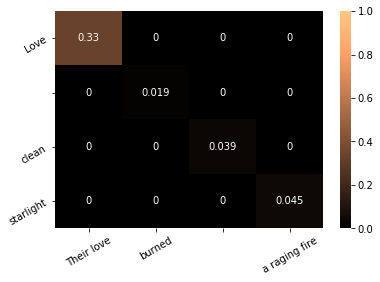

In [8]:
v1, v2 = 12, 14

yax_labs = ['', '', '', '']
xax_labs = ['', '', '', '']
ds = np.zeros((4,4))

for i, (vec, label) in enumerate(zip([topic_vectors, event_vectors, ground_vectors, vehicle_vectors], ['topic', 'event', 'ground', 'vehicle'])):
    d = 1 - pdist(vec[[v1, v2], :], 'cosine')
    
    ds[i, i] = d

    e = sentences.loc[v1, [label, 'original']].values
    phrase1 = np.array([tk.text for tk in nlp(e[1])])[e[0]]
    yax_labs[i] = ' '.join(phrase1)

    e = sentences.loc[v2, [label, 'original']].values
    phrase2 = np.array([tk.text for tk in nlp(e[1])])[e[0]]
    xax_labs[i] = ' '.join(phrase2)

g = sns.heatmap(ds, vmin=0, vmax=1, annot=True, cmap='copper')
g.set_xticklabels(xax_labs, rotation=30);
g.set_yticklabels(yax_labs, rotation=30);

# Similarity with Latent Component

If we remove a component, the overall syntatical expression remains with a predictability that hopefully can be leveraged with a Gaussian Mixture Model (or some other latent variable maximization algorithm). 

In [9]:
inp = {'original': 'Their love burned as passionate as', 'topic': [0,1], 'ground': [4], 'event': [2], 'vehicle': None}

tokens = np.array([tk.text for tk in nlp(inp['original'])])

example_topic_vector =   np.random.random((1, 300))
example_event_vector =   np.random.random((1, 300))
example_ground_vector =  np.random.random((1, 300))
example_vehicle_vector = np.random.random((1, 300))

embedding = embed_tokens(tokens)

if inp['topic']:
    example_topic_vector = embedding[inp['topic']].mean(axis=0)
if inp['event']:
    example_event_vector = embedding[inp['event']].mean(axis=0)
if inp['ground']:
    example_ground_vector = embedding[inp['ground']].mean(axis=0)
if inp['vehicle']:
    example_vehicle_vector = embedding[inp['vehicle']].mean(axis=0)


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


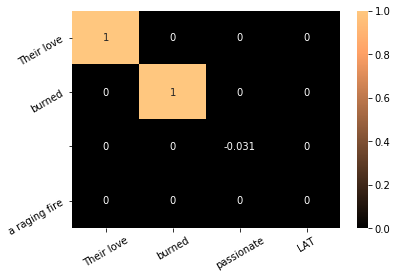

In [10]:
yax_labs = ['', '', '', '']
xax_labs = ['', '', '', '']
ds = np.zeros((4,4))

comp = 14

norm = [topic_vectors[comp, :], event_vectors[comp, :], ground_vectors[comp, :], vehicle_vectors[comp, :]]
example = [example_topic_vector, example_event_vector, example_ground_vector, example_vehicle_vector]
labels = ['topic', 'event', 'ground', 'vehicle']

for i in range(4):
    e = sentences.loc[comp, [labels[i], 'original']].values
    phrase1 = np.array([tk.text for tk in nlp(e[1])])[e[0]]
    yax_labs[i] = ' '.join(phrase1)
    if inp[labels[i]]:
        d = 1 - pdist(np.vstack([norm[i], example[i]]), 'cosine')
    
        ds[i, i] = d
        
        e = sentences.loc[v2, [labels[i], 'original']].values
        
        phrase2 = np.array([tk.text for tk in nlp(inp['original'])])[inp[labels[i]]]
        xax_labs[i] = ' '.join(phrase2)
    elif inp[labels[i]] is None:
        xax_labs[i] = 'LAT'

g = sns.heatmap(ds, vmin=0, vmax=1, annot=True, cmap='copper')
g.set_xticklabels(xax_labs, rotation=30);
g.set_yticklabels(yax_labs, rotation=30);

# Dimension Reduction

In [8]:
def get_component(simile_ix, comp):
    comp = sentences.loc[simile_ix, comp]
    return ' '.join([tk.text for i, tk in enumerate(sentences.loc[simile_ix, 'nlp']) if i in comp])

def get_components(comp):
    tokens = sentences.apply(lambda n: ' '.join([tk.text for i, tk in enumerate(n['nlp']) if i in n[comp]]), axis=1)

    return tokens

### PCA

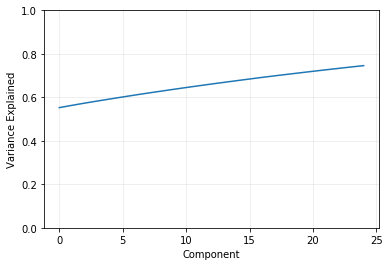

In [25]:
pca_comps = 25
dec = PCA(n_components=pca_comps)
decf = dec.fit_transform(ground_vectors)
    
plt.plot(list(range(pca_comps)), np.cumsum(dec.explained_variance_ratio_))
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.grid(alpha=0.25)
plt.ylim([0,1]);

# GMM

In [26]:
decomp_topic = PCA(n_components=3)
decomp_event = PCA(n_components=3)
decomp_ground = PCA(n_components=3)
decomp_vehicle = PCA(n_components=3)

redu_array = np.array([topic_vectors, event_vectors, ground_vectors, vehicle_vectors])

redu_topic_vectors = decomp_topic.fit_transform(redu_array[0])
redu_event_vectors = decomp_event.fit_transform(redu_array[1])
redu_ground_vectors = decomp_ground.fit_transform(redu_array[2])
redu_vehicle_vectors = decomp_vehicle.fit_transform(redu_array[3])

redu_all = np.hstack([redu_topic_vectors, redu_event_vectors, redu_ground_vectors, redu_vehicle_vectors])

In [27]:
redu_all.shape

(154, 12)

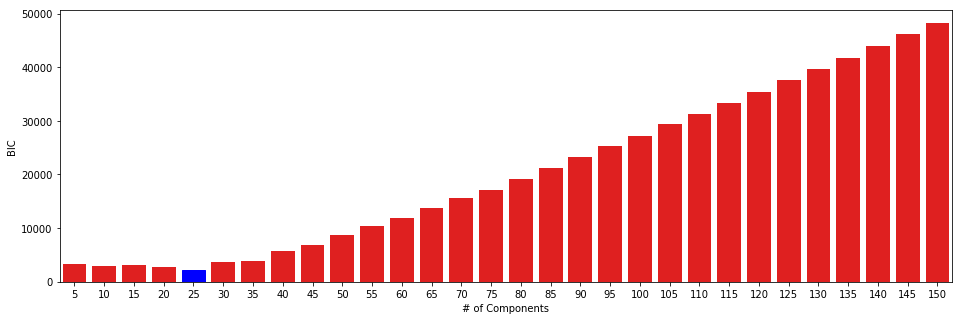

In [28]:
ns = np.arange(5, len(redu_all), 5)
bics = []

# calculate some metric for GMM of n components
for n_comp in ns:
    gm = GaussianMixture(n_components=n_comp, covariance_type='full', n_init=10, tol=1e-4)
    gmf = gm.fit(redu_all)
    
    bics.append(gmf.bic(redu_all))
    
plt.subplots(figsize=(16,5))
plt.ylabel('BIC')
plt.xlabel('# of Components')
g = sns.barplot(ns, bics, color='r');

g.patches[np.argmin(bics)].set_color('b')

In [29]:
n_comps = ns[np.argmin(bics)]
gm = GaussianMixture(n_components=n_comps, covariance_type='full', n_init=10, tol=1e-4)

%time gmf = gm.fit(redu_all)

gm

CPU times: user 469 ms, sys: 7.62 ms, total: 476 ms
Wall time: 261 ms


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=25, n_init=10, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

# Generative Model

In [30]:
component_ixs = [0,1,2,3]
component_tags = ['topic', 'event', 'ground', 'vehicle']
    
def cycle_latent_data(input_dict):
    global component_ixs

    tv = np.random.random((1, 300))
    ev = np.random.random((1, 300))
    gv = np.random.random((1, 300))
    vv = np.random.random((1, 300))

    embedding = embed_tokens(input_dict['tokens'])
    
    latent = []

    if inp['topic']:
        tv = embedding[inp['topic']].mean(axis=0)
    else:
        latent.append('topic')

    if inp['event']:
        ev = embedding[inp['event']].mean(axis=0)
    else:
        latent.append('event')

    if inp['ground']:
        gv = embedding[inp['ground']].mean(axis=0)
    else:
        latent.append('ground')

    if inp['vehicle']:
        vv = embedding[inp['vehicle']].mean(axis=0)
    else:
        latent.append('vehicle')   
        
    out = []
    
    for mix in permutations(latent):
        combined = np.array([tv, ev, gv, vv])
        mixout = []
        for lat in mix:
            ix = component_tags.index(lat)
            del component_ixs[ix]
            latent, vocab_ix, comp, post_prob = cycle_potential_vocab(lat, combined[component_ixs])
            mixout.append([ix, vocab_ix, comp, post_prob])
            combined[ix] = redu_array[ix, vocab_ix]
            component_ixs = [0,1,2,3]
            
        out.append(mixout)
        
    return np.array(out)

def cycle_potential_vocab(latent_component, remaining_components):
    '''
    Given an unknown vector, but three known vectors, iterate over all vocabularly possibilities to
    maximize the posterior.
    
    i.e. choose the best vocab for the missing data
    '''
    if latent_component is 'topic':
        posteriors = np.zeros((len(topic_vectors), 2))
        for i, vec in enumerate(topic_vectors):
            posteriors[i, :] = choose_best_mixture(gmf, vec, remaining_components[0], remaining_components[1], remaining_components[2])
    
    elif latent_component is 'event':
        posteriors = np.zeros((len(event_vectors), 2))
        for i, vec in enumerate(event_vectors):
            posteriors[i, :] = choose_best_mixture(gmf, remaining_components[0], vec, remaining_components[1], remaining_components[2])
    
    elif latent_component is 'ground':
        posteriors = np.zeros((len(ground_vectors), 2))
        for i, vec in enumerate(ground_vectors):
            posteriors[i, :] = choose_best_mixture(gmf, remaining_components[0], remaining_components[1], vec, remaining_components[2])
    
    elif latent_component is 'vehicle':
        posteriors = np.zeros((len(vehicle_vectors), 2))
        for i, vec in enumerate(vehicle_vectors):
            posteriors[i, :] = choose_best_mixture(gmf, remaining_components[0], remaining_components[1], remaining_components[2], vec)
    
    m = np.argmax(posteriors[:, 1])
    return latent_component, m, posteriors[m, 0], posteriors[m, 1] 
    
def choose_best_mixture(gmm, topic, event, ground, vehicle):
    '''
    Given four vector components, return the MAP estimate of which Gaussian component the vectors should
    belong to.
    
    i.e. choose the best model for and probability of the given data
    '''
    redu_topic = decomp_topic.transform(np.atleast_2d(topic))
    redu_event = decomp_event.transform(np.atleast_2d(event))
    redu_ground = decomp_ground.transform(np.atleast_2d(ground))
    redu_vehicle = decomp_vehicle.transform(np.atleast_2d(vehicle))
    
    redu_all = np.hstack([redu_topic, redu_event, redu_ground, redu_vehicle])
    
    posteriors = np.zeros(n_comps)
    
    for gmm_comp in range(n_comps):
        mean = gmm.means_[gmm_comp, :]
        cov = gmm.covariances_[gmm_comp, :, :]
        
        rv = multivariate_normal(mean=mean, cov=cov)
                
        posteriors[gmm_comp] = rv.logpdf(redu_all) 
                        
    return (np.argmax(posteriors), np.max(posteriors))

In [50]:
def piece_fit(fit):
    complete = {}
    for comp_ix in component_ixs:
        tag = component_tags[comp_ix]

        if comp_ix in fit[:, 0].astype(int):
            w = np.where(fit[:, 0].astype(int) == comp_ix)[0]
            text = get_component(int(fit[w, 1]), tag)
            complete[tag] = text
        else:
            complete[tag] = " ".join(inp["tokens"][inp[tag]])

    return complete

def format_simile(components):
    t = components['topic']
    e = components['event']
    g = components['ground']
    v = components['vehicle']
    if g and t and e and v:
        return f'{t} {e} as {g} as {v}'
    elif not g and t and e and v:
        return f'{t} {e} like {v}'
    elif not t and g and not e and v:
        return f'{g} like {v}'
    elif not e and t and g and v:
        return f'{t} as {g} as {v}'
    else:
        return components

In [59]:
inp = {'original': 'The thunder struck as loud as', 'topic': [0, 1], 'ground': [4], 'event': [2], 'vehicle': None}
inp['tokens'] = np.array([tk.text for tk in nlp(inp['original'])])

z = cycle_latent_data(inp)

best_fit = np.argmax(np.sum(z[:, :, 3], axis=1))

format_simile(piece_fit(z[best_fit]))

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


'The thunder struck as loud as sugar'